# Group Challenge 2: Image Registration

Create a plugin to register two images and allow users to choose between two algorithms. The plugin should enable users to:

1) Select a moving and a fixed image layer
2) Choose between two different registration methods
3) Display the warped image in the napari viewer

- Watch [this demo video](https://youtu.be/JEcsLG1Z26k) to see the plugin in action

### Register images

Your plugin should implement two image registration techniques: "Phase Cross Correlation" and "Optical Flow". You should use the `registration.phase_cross_correlation` and `registration.optical_flow_tvl1` functions from scikit-image. 

- [Documentation for `skimage.phase_cross_correlation`](https://scikit-image.org/docs/stable/api/skimage.registration.html#skimage.registration.phase_cross_correlation)
- [Documentation for `simage.optical_flow_tvl1`](https://scikit-image.org/docs/stable/api/skimage.registration.html#skimage.registration.optical_flow_tvl1)

### Add affine transform to `Image` layer in napari

Instead of applying the transformation found with `phase_cross_correlation`, modify the `affine` parameter of your moving `Image` layer. Keep in mind, that you will only have to deal with translation.

<div>
<center><img src="Images%2Faffine_transformation_matrix.png" width="300"/><center>
</div>

- [Documentation for `napari.utils.transforms.Affine`](https://napari.org/0.5.6/api/napari.utils.transforms.Affine.html)

### Warping images

The "Optical Flow" algorithm is a non-linear registration algorithm and will require you to warp the moving image. A handy function for this is the `transform.warp` function from scikit-image.

- [Documentation for `skimage.transform.warp`](https://scikit-image.org/docs/stable/api/skimage.transform.html#skimage.transform.warp)

### Add optical flow as `Vectors` layer

To provide the user with additional information, add the estimated optical flow components as vectors to the napari viewer using the `Vectors` layer. 

- [Documentation for `napari.layers.vectors`](https://napari.org/0.5.6/api/napari.layers.Vectors.html)

## Load sample data

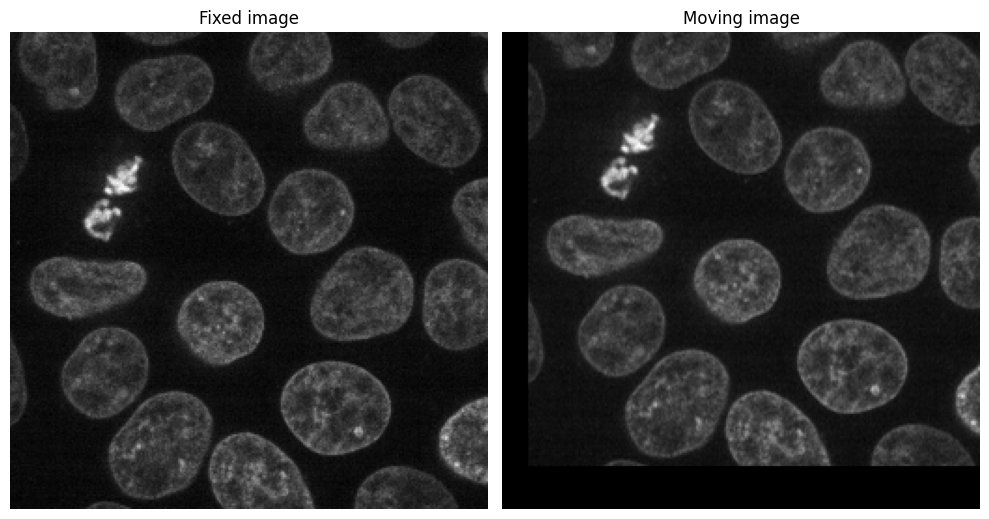

In [5]:
from skimage import data
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt

IMAGE2D = data.cells3d()[30,1]

trafo_matrix = np.eye(3)
trafo_matrix[0,2] = -22.4
trafo_matrix[1,2] = 13.2    

inv_mat = np.linalg.inv(trafo_matrix)
IMAGE2D_offset = ndimage.affine_transform(input=IMAGE2D,
                                          matrix=inv_mat,
                                          output_shape=IMAGE2D.shape,
                                          order=2)

fig, ax = plt.subplots(1, 2, figsize=(10,20))
ax[0].imshow(IMAGE2D, cmap='gray')
ax[0].axis('off')
ax[0].set_title('Fixed image')
ax[1].imshow(IMAGE2D_offset, cmap='gray')
ax[1].axis('off')
ax[1].set_title('Moving image')
fig.tight_layout()
plt.show()

In [3]:
# Your plugin